In [1]:
# Plots bias in Qsi and Tau between ground observations and products
####################################################################################################

# must insert this statement to render the plots within the notebook
# this is specific to the ipython notebook
%matplotlib inline

## Import statements
# netcdf/numpy/xray
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xray

# OS interaction
import sys, pickle, os

# import subplots function for plotting
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('paper')
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import kgraph

#### Directory Lists
# Unix
if 'linux' in sys.platform:
    dir_pre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dir_pre = '/Users/karllapo/gdrive/'

dir_data = dir_pre+'SnowHydrology/proj/CloudClimatology/data'
dir_print = dir_pre+'SnowHydrology/proj/CloudClimatology/Graphics'

# Directory for basemap pickle files
dir_bmap = dir_pre+'SnowHydrology/proj/CloudClimatology/data/basemap'

In [2]:
####################################################################################################
# Load Data
####################################################################################################
os.chdir(dir_data)
grobs = xray.open_dataset('grobs.daily.nc')
grobs_diff = xray.open_dataset('grobs_bias.daily.nc')
anom_day = xray.open_dataset('tau_anom.daily.nc')
anom_mon = xray.open_dataset('tau_anom.monthly.nc')
tau = xray.open_dataset('tau.daily.nc')

## Names
pr_names = ['mtclim','nldas','syn','wrf']
num_products = np.size(pr_names)
grouping = ['north cv','south cv','west of crest','foothills','east of crest']

## Transmissivity
tau_products = xray.Dataset()
full_pr_names = ['mtclim','nldas','syn','wrf','grobs']
for pr in full_pr_names:
    tau_products[pr] = grobs[pr]/(np.sin(grobs.el*np.pi/180)*1365)
    
    

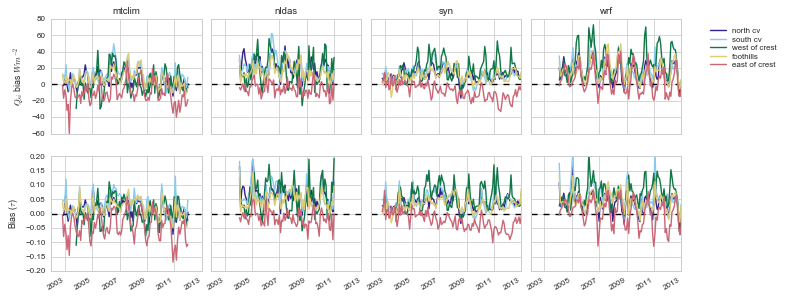

In [3]:
#####################################
## Time series of bias by Grouping ##
#####################################
# formating preface
colsche = kgraph.SRON(5)
fig = plt.figure(figsize=(12,5))
gs = matplotlib.gridspec.GridSpec(2,5,\
                                  width_ratios=np.array((5,5,5,5,1)))
gs.update(wspace=0.075)

for n,pr in enumerate(pr_names):
    ###################
    # Shortwave Bias ##
    ###################
    ax = plt.subplot(gs[0,n])
    plt.plot(np.array([datetime(2002,1,1),datetime(2013,1,1)]),np.array([0,0]),'k--')
    
    ## Format Qsi bias
    ds_plot = grobs_diff[pr].resample(freq='M', dim='time', how='mean')
    
    for m,gr in enumerate(grouping):
        plt.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],color=colsche[m],label=gr)
    
    # Labels
    if n == 0:
        ax.set_ylabel('$Q_{si}$ bias $Wm^{-2}$')
        # Legend handles
        handles, labels = ax.get_legend_handles_labels()
    else:
        ax.yaxis.set_ticklabels([])
    ax.set_xlim(datetime(2002,1,1),datetime(2013,1,1))
    ax.set_ylim(-60,80)
    ax.set_title(pr)
    
    ###################
    #    Tau Bias    ##
    ###################
    ax = plt.subplot(gs[1,n])
    plt.plot(np.array([datetime(2002,1,1),datetime(2013,1,1)]),np.array([0,0]),'k--')

    ## Format tau bias
    tau_diff = (tau_products[pr]-tau_products.grobs).swap_dims({'station':'Grouping'})
    tau_diff = tau_diff.resample(freq='M', dim='time', how='mean')

    # Plot tau bias
    for m,gr in enumerate(grouping):
        plt.plot(tau_diff.time,tau_diff.loc[{'Grouping':gr}].mean('Grouping'),color=colsche[m],label=gr)
    
    # Labels
    if n == 0:
        ax.set_ylabel('Bias ($\\tau$)')
        # Legend handles
        handles, labels = ax.get_legend_handles_labels()
    else:
        ax.yaxis.set_ticklabels([])
    ax.set_xlim(datetime(2002,1,1),datetime(2013,1,1))
    ax.set_ylim(-.2,.2)

    
# Legend
ax = plt.subplot(gs[0,-1])
ax.axis('off')
ax.legend(handles, labels,loc='center',ncol=1,\
                    labelspacing=.25,markerscale=1,numpoints=1,\
                    bbox_to_anchor=(1.5, .5, .5, .5))
fig.autofmt_xdate()

os.chdir(dir_print)
fname = 'SWdwn_bias_monthly.groups.png'
fig.savefig(fname)


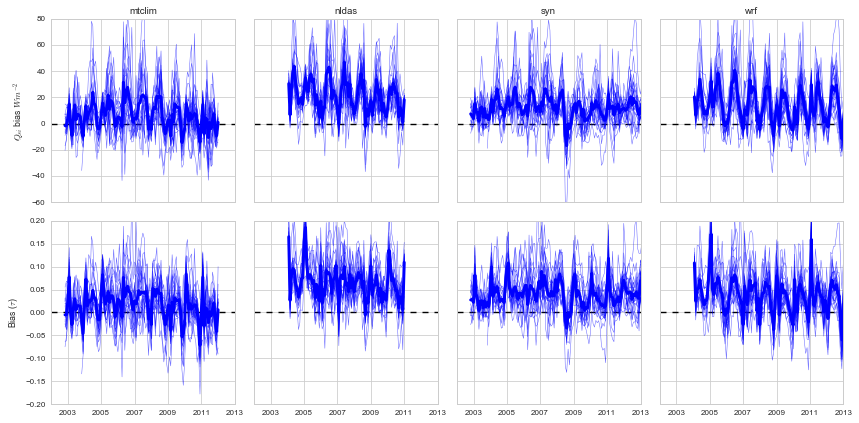

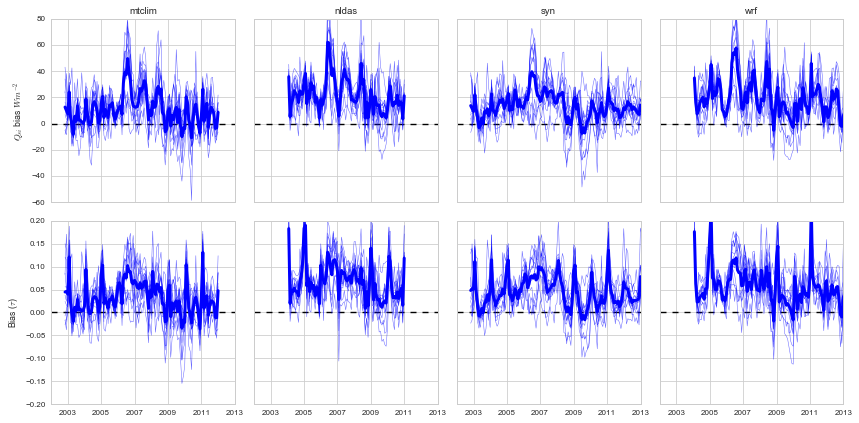

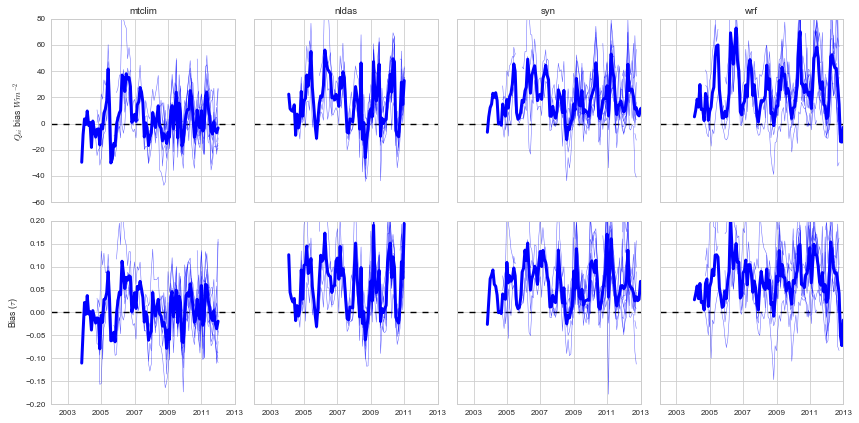

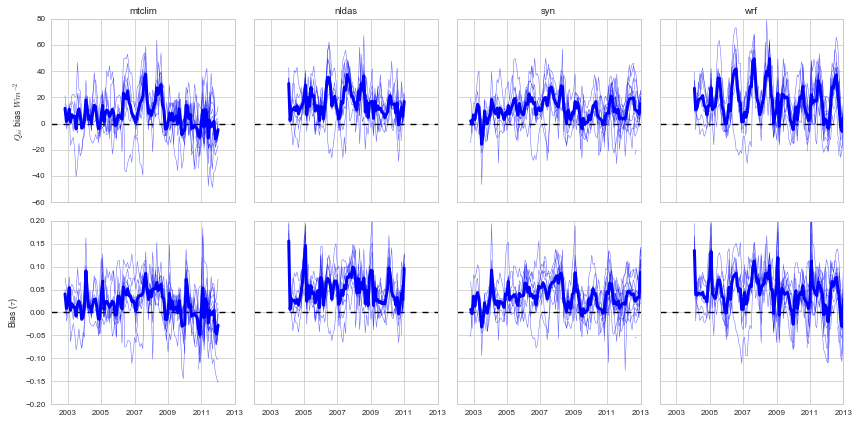

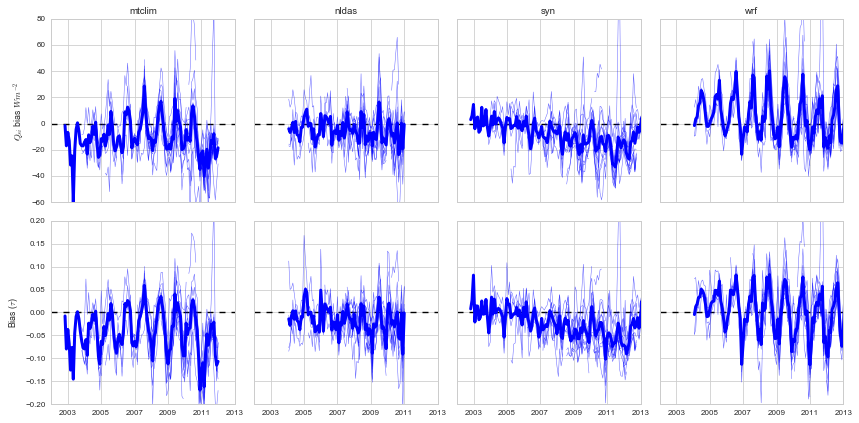

In [4]:
#########################################################
## Time series of bias by Grouping - Each individually ##
#########################################################
# formating preface
grouping = ['north cv','south cv','west of crest','foothills','east of crest']
colsche = kgraph.SRON(5)

for n,gr in enumerate(grouping):
    fig, axes = plt.subplots(2,4,figsize=(12,6),sharex='col',sharey='row')
    for m,pr in enumerate(pr_names):
        ax = axes[0,m]
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs)
        ds_plot = ds_plot.swap_dims({'station':'Grouping'}).resample(freq='M', dim='time', how='mean')
        
        ax.plot(np.array([datetime(2002,1,1),datetime(2013,1,1)]),np.array([0,0]),'k--')
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],\
                color='b',label=gr,alpha=.6,lw=.5)
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}].mean(dim='Grouping'),\
                color='b',label=gr,lw=3)


        # Labels
        if m == 0:
            ax.set_ylabel('$Q_{si}$ bias $Wm^{-2}$')
        ax.set_xlim(datetime(2002,1,1),datetime(2013,1,1))
        ax.set_ylim(-60,80)
        ax.set_title(pr)
    
        ###################
        #    Tau Bias    ##
        ###################
        ax = axes[1,m]
        ax.plot(np.array([datetime(2002,1,1),datetime(2013,1,1)]),np.array([0,0]),'k--')
        
        ## Format tau bias
        tau_diff = (tau_products[pr]-tau_products.grobs).swap_dims({'station':'Grouping'})
        tau_diff = tau_diff.resample(freq='M', dim='time', how='mean')
        
        ax.plot(tau_diff.time,tau_diff.loc[{'Grouping':gr}],\
                color='b',label=gr,alpha=.6,lw=.5)
        
        ax.plot(tau_diff.time,tau_diff.loc[{'Grouping':gr}].mean('Grouping'),\
                color='b',label=gr,lw=3)
    
        # Labels
        if m == 0:
            ax.set_ylabel('Bias ($\\tau$)')
        ax.set_xlim(datetime(2002,1,1),datetime(2013,1,1))
        ax.set_ylim(-.2,.2)
    
    plt.tight_layout()
    os.chdir(dir_print)
    fname = 'SWdwn_Tau.MonthlyBias.'+gr+'.png'
    fig.savefig(fname)
#     plt.close(fig)


//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


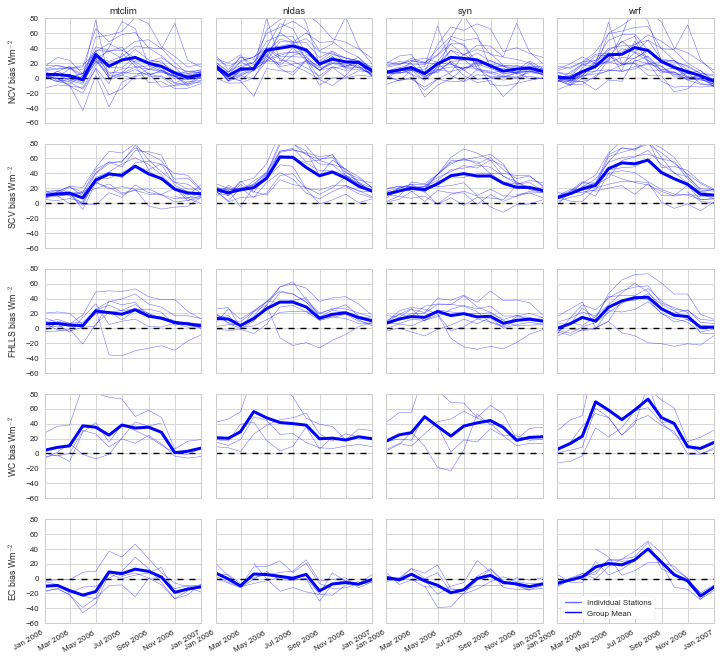

In [5]:
#########################################################
##      Time series of bias by Grouping - Panel        ##
#########################################################
# formating preface
grouping = ['north cv','south cv','foothills','west of crest','east of crest']
grouping_shortlabel = ['NCV','SCV','FHLLS','WC','EC']
colsche = kgraph.SRON(5)

fig = plt.figure(figsize=(12,12))
gs = matplotlib.gridspec.GridSpec(5,4)
gs.update(wspace=0.09)

for n,gr in enumerate(grouping):
    for m,pr in enumerate(pr_names):
        if pr == 'grobs':
            continue
        ax = plt.subplot(gs[n,m])
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs)
        ds_plot = ds_plot.swap_dims({'station':'Grouping'}).resample(freq='M', dim='time', how='mean')
        
        ax.plot(np.array([datetime(2006,1,1),datetime(2007,1,1)]),np.array([0,0]),'k--')
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],\
                color='b',alpha=.6,lw=.5)
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}].mean(dim='Grouping'),\
                color='b',lw=3)
        
        # Labels - products
        if n == 0:
            ax.set_title(pr)
        # Labels - groups
        if m == 0:
            ax.set_ylabel(grouping_shortlabel[n]+' bias Wm$^{-2}$')
        else:
            ax.yaxis.set_ticklabels([])
        # Legend
        if n == 0 and m == 0:
            ax.legend(ncol=1)


        ax.set_xlim(datetime(2006,1,1),datetime(2007,1,1))
        ax.set_ylim(-60,80)
    
## Legend
import matplotlib.lines as mlines
label = ['Individual Stations','Group Mean']
alpha = np.array([.6,1])
h = [mlines.Line2D([],[],color='b',label=lab, alpha=a) \
            for a,lab in zip(alpha,label)]
leg = plt.legend(handles=h,loc='lower left',frameon=True)
fig.autofmt_xdate()
   
os.chdir(dir_print)
fname = 'SWdwn_bias_monthly.AllGroups.png'
fig.savefig(fname)
# plt.close(fig)

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


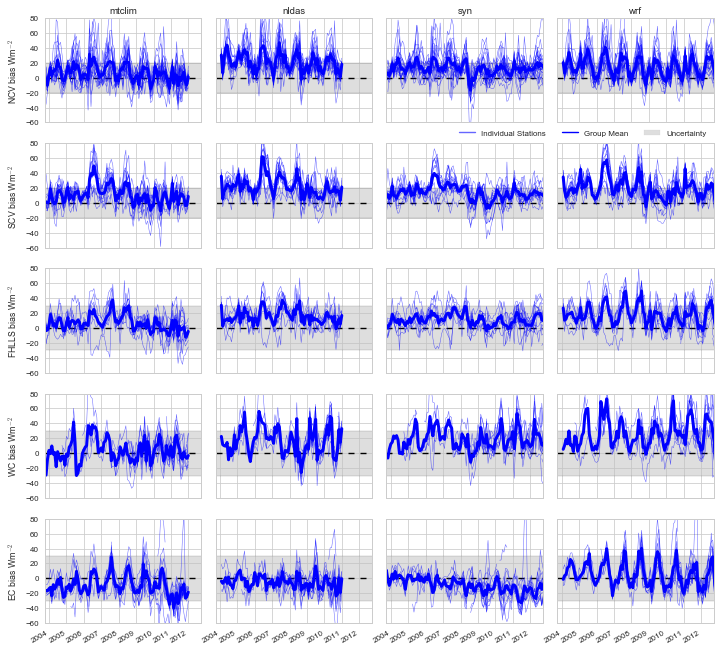

In [6]:
########################################################################
##      Time series of bias by Grouping - Panel w/ Uncertainty        ##
########################################################################
# formating preface
grouping = ['north cv','south cv','foothills','west of crest','east of crest']
grouping_shortlabel = {'north cv':'NCV','south cv':'SCV','foothills':'FHLLS','west of crest':'WC','east of crest':'EC'}
grouping_uncertainty = {'north cv':20,'south cv':20,'foothills':30,'west of crest':30,'east of crest':30}
colsche = kgraph.SRON(5)


# Figure
fig = plt.figure(figsize=(12,12))
gs = matplotlib.gridspec.GridSpec(5,4)
gs.update(wspace=0.09)

# Date limits
d1 = datetime(2003,10,1)
d2 = datetime(2012,10,1)

for n,gr in enumerate(grouping):
    for m,pr in enumerate(pr_names):
        if pr == 'grobs':
            continue
        ax = plt.subplot(gs[n,m])
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs)
        ds_plot = ds_plot.swap_dims({'station':'Grouping'}).resample(freq='M', dim='time', how='mean')
 
        # Uncertainty estimate
        ax.fill_between(ds_plot.time.values,-grouping_uncertainty[gr],grouping_uncertainty[gr],\
                        facecolor='.75',alpha=.5)
        # Zero line
        ax.plot(np.array([d1,d2]),np.array([0,0]),'k--')
        # Each station
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],\
                color='b',alpha=.6,lw=.5)
        # Group mean
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}].mean(dim='Grouping'),\
                color='b',lw=3)
  
        # Labels - products
        if n == 0:
            ax.set_title(pr)
        # Labels - groups
        if m == 0:
            ax.set_ylabel(grouping_shortlabel[gr]+' bias Wm$^{-2}$')
        else:
            ax.yaxis.set_ticklabels([])
        # Legend
        if n == 0 and m == 0:
            ax.legend(ncol=1)
        # Axes limits
        ax.set_xlim(d1,d2)
        ax.set_ylim(-60,80)
    
## Legend
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
label = ['Individual Stations','Group Mean']
alpha = np.array([.6,1])
h = [mlines.Line2D([],[],color='b',label=lab, alpha=a) \
            for a,lab in zip(alpha,label)]
h.append(mpatches.Patch(color='.75',alpha=.5, label='Uncertainty'))
ax = plt.subplot(gs[0,3])
leg = ax.legend(handles=h,bbox_to_anchor=(.5, -.5, .5, .5),ncol=3)
fig.autofmt_xdate()
   
os.chdir(dir_print)
fname = 'SWdwn_bias_monthly.AllGroups.Uncertainty.pdf'
fig.savefig(fname)
fname = 'SWdwn_bias_monthly.AllGroups.Uncertainty.png'
fig.savefig(fname)

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


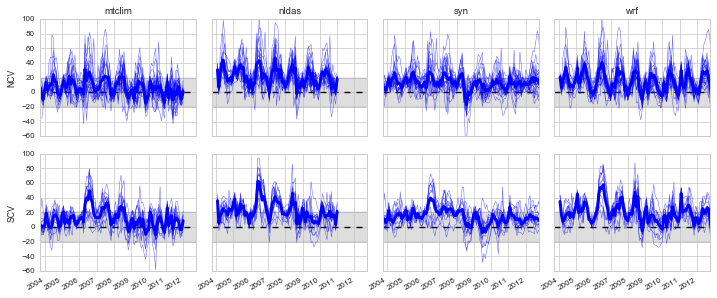

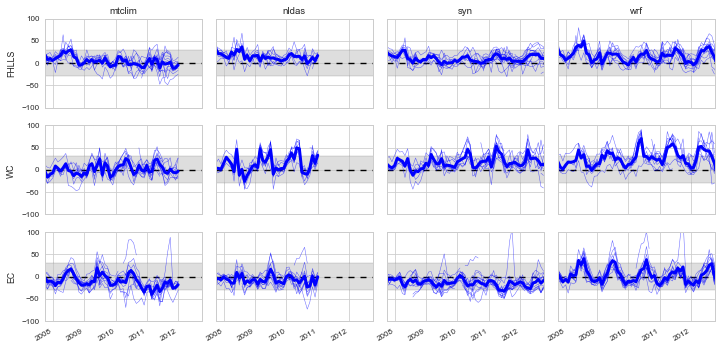

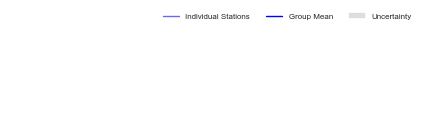

In [7]:
############################################################################################
##      Time series of bias by Grouping - Panel w/ Uncertainty, Valley vs Mountain        ##
############################################################################################
# formating preface
grouping_shortlabel = {'north cv':'NCV','south cv':'SCV','foothills':'FHLLS','west of crest':'WC','east of crest':'EC'}
grouping_uncertainty = {'north cv':20,'south cv':20,'foothills':30,'west of crest':30,'east of crest':30}
colsche = kgraph.SRON(5)
# Figure
fig = plt.figure(figsize=(12,5))
gs = matplotlib.gridspec.GridSpec(2,4)
gs.update(wspace=0.1)
gs.update(hspace=0.15)
# Date limits
d1 = datetime(2003,10,1)
d2 = datetime(2012,10,1)

#### Valley
grouping = ['north cv','south cv']
for n,gr in enumerate(grouping):
    for m,pr in enumerate(pr_names):
        if pr == 'grobs':
            continue
        ax = plt.subplot(gs[n,m])
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs)
        ds_plot = ds_plot.swap_dims({'station':'Grouping'}).resample(freq='M', dim='time', how='mean')
 
        # Uncertainty estimate
        ax.fill_between(ds_plot.time.values,-grouping_uncertainty[gr],grouping_uncertainty[gr],\
                        facecolor='.75',alpha=.5)
        # Zero line
        ax.plot(np.array([d1,d2]),np.array([0,0]),'k--')
        # Each station
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],\
                color='b',alpha=.6,lw=.5)
        # Group mean
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}].mean(dim='Grouping'),\
                color='b',lw=3)
  
        # Labels - products
        if n == 0:
            ax.set_title(pr)
        # Labels - groups
        if m == 0:
            ax.set_ylabel(grouping_shortlabel[gr])
        else:
            ax.yaxis.set_ticklabels([])
        # Legend
        if n == 0 and m == 0:
            ax.legend(ncol=1)
        # Axes limits
        ax.set_xlim(d1,d2)
        ax.set_ylim(-60,100)

fig.autofmt_xdate()
   
os.chdir(dir_print)
fname = 'SWdwn_bias_monthly.AllGroups.Uncertainty.Valley.pdf'
fig.savefig(fname)

#### Mountain
grouping = ['foothills','west of crest','east of crest']
# Figure
fig = plt.figure(figsize=(12,6))
gs = matplotlib.gridspec.GridSpec(3,4)
gs.update(wspace=0.09)
# Date limits
d1 = datetime(2007,10,1)
d2 = datetime(2012,10,1)
for n,gr in enumerate(grouping):
    for m,pr in enumerate(pr_names):
        if pr == 'grobs':
            continue
        ax = plt.subplot(gs[n,m])
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs)
        ds_plot = ds_plot.swap_dims({'station':'Grouping'}).resample(freq='M', dim='time', how='mean')
 
        # Uncertainty estimate
        ax.fill_between(ds_plot.time.values,-grouping_uncertainty[gr],grouping_uncertainty[gr],\
                        facecolor='.75',alpha=.5)
        # Zero line
        ax.plot(np.array([d1,d2]),np.array([0,0]),'k--')
        # Each station
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],\
                color='b',alpha=.6,lw=.5)
        # Group mean
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}].mean(dim='Grouping'),\
                color='b',lw=3)
  
        # Labels - products
        if n == 0:
            ax.set_title(pr)
        # Labels - groups
        if m == 0:
            ax.set_ylabel(grouping_shortlabel[gr])
        else:
            ax.yaxis.set_ticklabels([])
        # Legend
        if n == 0 and m == 0:
            ax.legend(ncol=1)
        # Axes limits
        ax.set_xlim(d1,d2)
        ax.set_ylim(-100,100)

fig.autofmt_xdate()
   
os.chdir(dir_print)
fname = 'SWdwn_bias_monthly.AllGroups.Uncertainty.Mountain.pdf'
fig.savefig(fname)
        
## Legend
## Legend (separate figure)
leg_fig = plt.figure(figsize=(7,2))
leg_ax = plt.axes()
leg_ax.axis('off')

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
label = ['Individual Stations','Group Mean']
alpha = np.array([.6,1])
h = [mlines.Line2D([],[],color='b',label=lab, alpha=a) \
            for a,lab in zip(alpha,label)]
h.append(mpatches.Patch(color='.75',alpha=.5, label='Uncertainty'))
_out = leg_ax.legend(handles=h,borderaxespad=0.,ncol=3)
leg_fig.savefig('SWdwn_bias_monthly.AllGroups.Uncertainty.Legend.pdf')

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


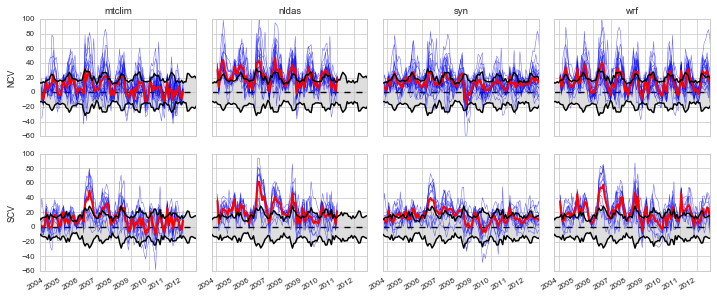

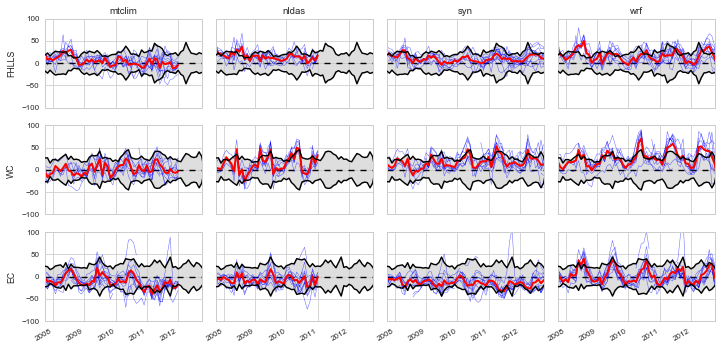

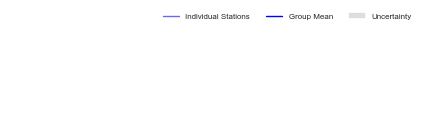

In [8]:
# formating preface
grouping_shortlabel = {'north cv':'NCV','south cv':'SCV','foothills':'FHLLS','west of crest':'WC','east of crest':'EC'}
grouping_uncertainty = {'north cv':20,'south cv':20,'foothills':30,'west of crest':30,'east of crest':30}
colsche = kgraph.SRON(5)
# Figure
fig = plt.figure(figsize=(12,5))
gs = matplotlib.gridspec.GridSpec(2,4)
gs.update(wspace=0.1)
gs.update(hspace=0.15)
# Date limits
d1 = datetime(2003,10,1)
d2 = datetime(2012,10,1)

#### Valley
grouping = ['north cv','south cv']
for n,gr in enumerate(grouping):
    for m,pr in enumerate(pr_names):
        if pr == 'grobs':
            continue
        ax = plt.subplot(gs[n,m])
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs)
        ds_plot = ds_plot.swap_dims({'station':'Grouping'}).resample(freq='M', dim='time', how='mean')
 
        # Uncertainty estimates
        # Monthly standard deviation between stations
        monthlySTD = grobs.grobs.swap_dims({'station':'Grouping'}).loc[{'Grouping':gr}].\
                                           std(dim='Grouping').resample(dim='time', how='mean', freq='M')
        ax.plot(monthlySTD.time.values,monthlySTD.values,'k', zorder=5)
        ax.plot(monthlySTD.time.values,-monthlySTD.values,'k', zorder=5)
        ax.fill_between(monthlySTD.time.values,-monthlySTD,monthlySTD,\
                        facecolor='.75',alpha=.5)
                
        # Zero line
        ax.plot(np.array([d1,d2]),np.array([0,0]),'k--')
        
        # Each station
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],\
                color='b',alpha=.6,lw=.5)
        
        # Group mean
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}].mean(dim='Grouping'),\
                color='r',lw=2)
  
        # Labels - products
        if n == 0:
            ax.set_title(pr)
        # Labels - groups
        if m == 0:
            ax.set_ylabel(grouping_shortlabel[gr])
        else:
            ax.yaxis.set_ticklabels([])
        # Legend
        if n == 0 and m == 0:
            ax.legend(ncol=1)
        # Axes limits
        ax.set_xlim(d1,d2)
        ax.set_ylim(-60,100)

fig.autofmt_xdate()
   
os.chdir(dir_print)
# fname = 'SWdwn_bias_monthly.AllGroups.Uncertainty.Valley.pdf'
fig.savefig(fname)

#### Mountain
grouping = ['foothills','west of crest','east of crest']
# Figure
fig = plt.figure(figsize=(12,6))
gs = matplotlib.gridspec.GridSpec(3,4)
gs.update(wspace=0.09)
# Date limits
d1 = datetime(2007,10,1)
d2 = datetime(2012,10,1)
for n,gr in enumerate(grouping):
    for m,pr in enumerate(pr_names):
        if pr == 'grobs':
            continue
        ax = plt.subplot(gs[n,m])
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs)
        ds_plot = ds_plot.swap_dims({'station':'Grouping'}).resample(freq='M', dim='time', how='mean')
 
        # Uncertainty estimates
        # Monthly standard deviation between stations
        monthlySTD = grobs.grobs.swap_dims({'station':'Grouping'}).loc[{'Grouping':gr}].\
                                           std(dim='Grouping').resample(dim='time', how='mean', freq='M')
        ax.plot(monthlySTD.time.values,monthlySTD.values,'k', zorder=5)
        ax.plot(monthlySTD.time.values,-monthlySTD.values,'k', zorder=5)
        ax.fill_between(monthlySTD.time.values,-monthlySTD,monthlySTD,\
                        facecolor='.75',alpha=.5)
                
        # Zero line
        ax.plot(np.array([d1,d2]),np.array([0,0]),'k--')
        
        # Each station
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],\
                color='b',alpha=.6,lw=.5)
        
        # Group mean
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}].mean(dim='Grouping'),\
                color='r',lw=2)
  
        # Labels - products
        if n == 0:
            ax.set_title(pr)
        # Labels - groups
        if m == 0:
            ax.set_ylabel(grouping_shortlabel[gr])
        else:
            ax.yaxis.set_ticklabels([])
        # Legend
        if n == 0 and m == 0:
            ax.legend(ncol=1)
        # Axes limits
        ax.set_xlim(d1,d2)
        ax.set_ylim(-100,100)

fig.autofmt_xdate()
   
os.chdir(dir_print)
fname = 'SWdwn_bias_monthly.AllGroups.Uncertainty.Mountain.pdf'
# fig.savefig(fname)
        
## Legend
## Legend (separate figure)
leg_fig = plt.figure(figsize=(7,2))
leg_ax = plt.axes()
leg_ax.axis('off')

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
label = ['Individual Stations','Group Mean']
alpha = np.array([.6,1])
h = [mlines.Line2D([],[],color='b',label=lab, alpha=a) \
            for a,lab in zip(alpha,label)]
h.append(mpatches.Patch(color='.75',alpha=.5, label='Uncertainty'))
_out = leg_ax.legend(handles=h,borderaxespad=0.,ncol=3)
# leg_fig.savefig('SWdwn_bias_monthly.AllGroups.Uncertainty.Legend.pdf')

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


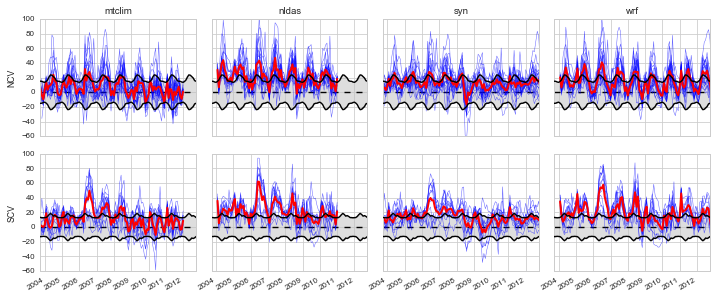

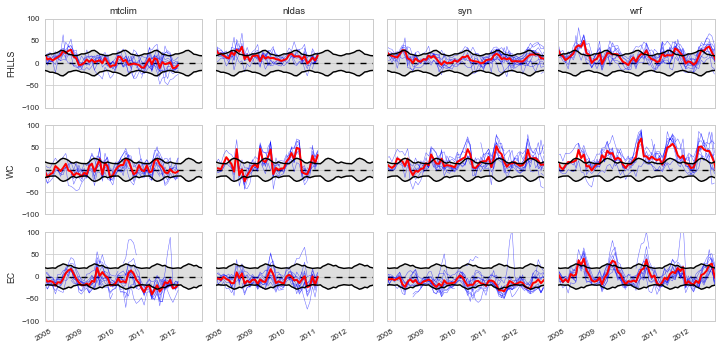

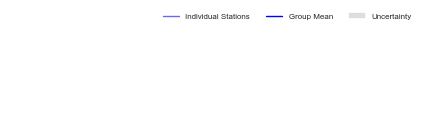

In [9]:
# formating preface
grouping_shortlabel = {'north cv':'NCV','south cv':'SCV','foothills':'FHLLS','west of crest':'WC','east of crest':'EC'}
grouping_uncertainty = {'north cv':20,'south cv':20,'foothills':30,'west of crest':30,'east of crest':30}
colsche = kgraph.SRON(5)
# Figure
fig = plt.figure(figsize=(12,5))
gs = matplotlib.gridspec.GridSpec(2,4)
gs.update(wspace=0.1)
gs.update(hspace=0.15)
# Date limits
d1 = datetime(2003,10,1)
d2 = datetime(2012,10,1)

#### Valley
grouping = ['north cv','south cv']
for n,gr in enumerate(grouping):
    for m,pr in enumerate(pr_names):
        if pr == 'grobs':
            continue
        ax = plt.subplot(gs[n,m])
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs)
        ds_plot = ds_plot.swap_dims({'station':'Grouping'}).resample(freq='M', dim='time', how='mean')
 
        # Uncertainty estimates
        # Monthly standard deviation between stations
        monthlySTD = grobs.grobs.swap_dims({'station':'Grouping'}).loc[{'Grouping':gr}].\
                                           std(dim='Grouping').groupby('time.month').mean(dim='time')
        mUnc = xray.DataArray(data=np.zeros(ds_plot.time.values.shape)*np.nan, coords={'time': ds_plot.time})
        monthlySTD = grobs.grobs.swap_dims({'station':'Grouping'}).loc[{'Grouping':gr}].\
                                           std(dim='Grouping').groupby('time.month').mean(dim='time')
        mUnc = mUnc.groupby('time.month').fillna(monthlySTD)
        ax.plot(mUnc.time.values,mUnc.values,'k', zorder=5)
        ax.plot(mUnc.time.values,-mUnc.values,'k', zorder=5)
        ax.fill_between(mUnc.time.values,-mUnc.values,mUnc.values,\
                        facecolor='.75',alpha=.5)
                
        # Zero line
        ax.plot(np.array([d1,d2]),np.array([0,0]),'k--')
        
        # Each station
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],\
                color='b',alpha=.6,lw=.5)
        
        # Group mean
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}].mean(dim='Grouping'),\
                color='r',lw=2)
  
        # Labels - products
        if n == 0:
            ax.set_title(pr)
        # Labels - groups
        if m == 0:
            ax.set_ylabel(grouping_shortlabel[gr])
        else:
            ax.yaxis.set_ticklabels([])
        # Legend
        if n == 0 and m == 0:
            ax.legend(ncol=1)
        # Axes limits
        ax.set_xlim(d1,d2)
        ax.set_ylim(-60,100)

fig.autofmt_xdate()
   
os.chdir(dir_print)
# fname = 'SWdwn_bias_monthly.AllGroups.Uncertainty.Valley.pdf'
fig.savefig(fname)

#### Mountain
grouping = ['foothills','west of crest','east of crest']
# Figure
fig = plt.figure(figsize=(12,6))
gs = matplotlib.gridspec.GridSpec(3,4)
gs.update(wspace=0.09)
# Date limits
d1 = datetime(2007,10,1)
d2 = datetime(2012,10,1)
for n,gr in enumerate(grouping):
    for m,pr in enumerate(pr_names):
        if pr == 'grobs':
            continue
        ax = plt.subplot(gs[n,m])
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs)
        ds_plot = ds_plot.swap_dims({'station':'Grouping'}).resample(freq='M', dim='time', how='mean')
 
        # Uncertainty estimates
        # Monthly standard deviation between stations
        monthlySTD = grobs.grobs.swap_dims({'station':'Grouping'}).loc[{'Grouping':gr}].\
                                           std(dim='Grouping').groupby('time.month').mean(dim='time')
        mUnc = xray.DataArray(data=np.zeros(ds_plot.time.values.shape)*np.nan, coords={'time': ds_plot.time})
        monthlySTD = grobs.grobs.swap_dims({'station':'Grouping'}).loc[{'Grouping':gr}].\
                                           std(dim='Grouping').groupby('time.month').mean(dim='time')
        mUnc = mUnc.groupby('time.month').fillna(monthlySTD)
        ax.plot(mUnc.time.values,mUnc.values,'k', zorder=5)
        ax.plot(mUnc.time.values,-mUnc.values,'k', zorder=5)
        ax.fill_between(mUnc.time.values,-mUnc.values,mUnc.values,\
                        facecolor='.75',alpha=.5)
                
        # Zero line
        ax.plot(np.array([d1,d2]),np.array([0,0]),'k--')
        
        # Each station
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}],\
                color='b',alpha=.6,lw=.5)
        
        # Group mean
        ax.plot(ds_plot.time,ds_plot.loc[{'Grouping':gr}].mean(dim='Grouping'),\
                color='r',lw=2)
  
        # Labels - products
        if n == 0:
            ax.set_title(pr)
        # Labels - groups
        if m == 0:
            ax.set_ylabel(grouping_shortlabel[gr])
        else:
            ax.yaxis.set_ticklabels([])
        # Legend
        if n == 0 and m == 0:
            ax.legend(ncol=1)
        # Axes limits
        ax.set_xlim(d1,d2)
        ax.set_ylim(-100,100)

fig.autofmt_xdate()
   
os.chdir(dir_print)
fname = 'SWdwn_bias_monthly.AllGroups.Uncertainty.Mountain.pdf'
# fig.savefig(fname)
        
## Legend
## Legend (separate figure)
leg_fig = plt.figure(figsize=(7,2))
leg_ax = plt.axes()
leg_ax.axis('off')

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
label = ['Individual Stations','Group Mean']
alpha = np.array([.6,1])
h = [mlines.Line2D([],[],color='b',label=lab, alpha=a) \
            for a,lab in zip(alpha,label)]
h.append(mpatches.Patch(color='.75',alpha=.5, label='Uncertainty'))
_out = leg_ax.legend(handles=h,borderaxespad=0.,ncol=3)
# leg_fig.savefig('SWdwn_bias_monthly.AllGroups.Uncertainty.Legend.pdf')

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


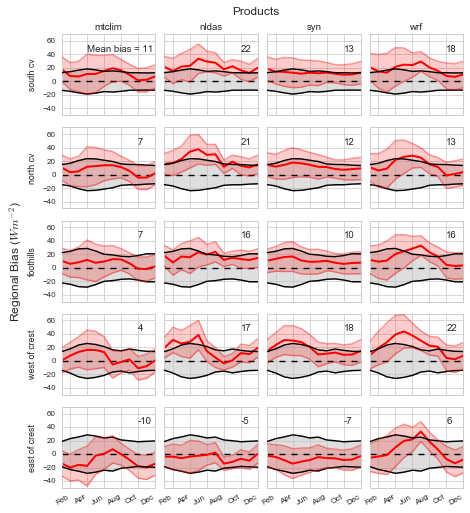

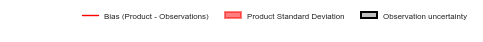

In [3]:
# formating preface
grouping_shortlabel = {'north cv': 'NCV', 'south cv': 'SCV', 'foothills': 'FHLLS',
                       'west of crest': 'WC','east of crest': 'EC'}
colsche = kgraph.SRON(5)
grouping = ['south cv', 'north cv', 'foothills','west of crest','east of crest']
monthTimes = np.arange(1,13)
monthLabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Figure
fig = plt.figure(figsize=(7.2, 9))
gs = matplotlib.gridspec.GridSpec(5, 4)
gs.update(wspace=0.1)
gs.update(hspace=0.15)

for n,gr in enumerate(grouping):
    for m,pr in enumerate(pr_names):
        if pr == 'grobs':
            continue
        ax = plt.subplot(gs[n,m])
        
        ###################
        # Shortwave Bias ##
        ###################
        ## Format Qsi bias
        ds_plot = (grobs[pr]-grobs.grobs).swap_dims({'station': 'Grouping'}).loc[{'Grouping':gr}]
        ds_plot_month = ds_plot.mean(dim='Grouping').groupby('time.month').mean(dim='time')

        # Uncertainty estimates -- monthly standard deviation between stations
        monthlySTD = grobs.grobs.swap_dims({'station':'Grouping'}).loc[{'Grouping':gr}].\
                                           std(dim='Grouping').groupby('time.month').\
                                           mean(dim='time')
        ax.plot(monthTimes, monthlySTD.values, 'k', zorder=5)
        ax.plot(monthTimes, -monthlySTD.values, 'k', zorder=5)
        ax.fill_between(monthTimes, -monthlySTD.values, monthlySTD.values,
                        facecolor='.75',alpha=.5)
                
        # Zero line
        ax.plot(np.array((monthTimes[0], monthTimes[-1])), np.array([0, 0]), 'k--')
        
        # Mean group bias
        ax.plot(monthTimes, ds_plot_month, color='r', lw=2)
        # Uncertainty estimates -- monthly standard deviation in product
        monthlySTD = grobs[pr].swap_dims({'station': 'Grouping'}).std(dim='Grouping').\
                                         groupby('time.month').mean(dim='time')
        ax.plot(monthTimes, ds_plot_month+monthlySTD.values, 'r', alpha=0.4, zorder=5)
        ax.plot(monthTimes, ds_plot_month-monthlySTD.values, 'r', alpha=0.4, zorder=5)
        ax.fill_between(monthTimes, ds_plot_month-monthlySTD.values,
                        ds_plot_month+monthlySTD.values,
                        facecolor='r', alpha=.2)
        
        # Text annotation of mean bias
        meanBias = ds_plot_month.mean(dim='month').values
        if n == 0 and m == 0:
            ax.text(4, 45, "Mean bias = " + "%.0f" % meanBias)
        else:
            ax.text(10, 45, "%.0f" % meanBias)
        # Labels - products
        if n == 0:
            ax.set_title(pr)
        # Labels - groups
        if m == 0:
            ax.set_ylabel(gr)
        else:
            ax.yaxis.set_ticklabels([])
        # Legend
        if n == 0 and m == 0:
            ax.legend(ncol=1)
        # x-axis label (months)
        if n == 4:
            ax.set_xticks(monthTimes[1:13:2])
            ax.set_xticklabels(monthLabels[1:13:2])
        # Axes limits
        ax.set_xlim(monthTimes[0], monthTimes[-1])
        ax.set_ylim(-50,70)
        
fig.text(0.5, 0.93, 'Products', ha='center', fontsize=12)
fig.text(0.02, 0.55, 'Regional Bias ($Wm^{-2}$)', va='center', rotation='vertical', fontsize=12)
fig.autofmt_xdate()
   
os.chdir(dir_print)
fname = 'SWdwnBias.monthComposite.allGroups.'
fig.savefig(fname + 'pdf')
fig.savefig(fname + 'png')
fig.savefig(fname + 'eps')

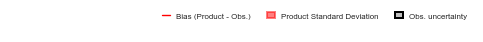

In [5]:
## Legend (separate figure)
leg_fig = plt.figure(figsize=(8,.25))
leg_ax = plt.axes()
leg_ax.axis('off')

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
h = [mlines.Line2D([], [], color='r',label='Bias (Product - Obs.)')]
h.append(mpatches.Patch(color='r', linewidth=2, alpha=.5, label='Product Standard Deviation'))
h.append(mpatches.Patch(facecolor='.75', linewidth=2, edgecolor= '0.', label='Obs. uncertainty'))
_out = leg_ax.legend(handles=h, borderaxespad=0., ncol=3, handlelength=1)
leg_fig.savefig(fname + '.Legend.pdf')
leg_fig.savefig(fname + '.Legend.eps')
leg_fig.savefig(fname + '.Legend.png')

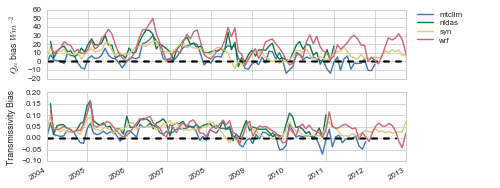

In [11]:
#####################################
## Time series of bias by Grouping ##
#####################################
# formating preface
colsche = kgraph.SRON(4)
fig = plt.figure(figsize=(8, 3))
gs = matplotlib.gridspec.GridSpec(2, 2, width_ratios=np.array((5, 1)))
gs.update(wspace=0.075)

for n,pr in enumerate(pr_names):
    ###################
    # Shortwave Bias ##
    ###################
    ax = plt.subplot(gs[0,0])
    ax.plot(np.array([datetime(2004,1,1),datetime(2012,10,1)]),np.array([0,0]),'k--')
    
    ## Format Qsi bias
    ds_plot = grobs_diff[pr].resample(freq='M', dim='time', how='mean').mean(dim='Grouping')
    ax.plot(ds_plot.time, ds_plot.values, color=colsche[n], label=pr)

# Labels
ax.set_ylabel('$Q_{si}$ bias $Wm^{-2}$')
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(datetime(2004,1,1),datetime(2012,10,1))
ax.set_ylim(-20,60)

for n,pr in enumerate(pr_names):
    ###################
    #    Tau Bias    ##
    ###################
    ax = plt.subplot(gs[1,0])
    ax.plot(np.array([datetime(2002,1,1),datetime(2012,10,1)]),np.array([0,0]),'k--')

    ## Format tau bias
    tau_diff = (tau_products[pr]-tau_products.grobs).swap_dims({'station':'Grouping'})
    tau_diff = tau_diff.resample(freq='M', dim='time', how='mean').mean(dim='Grouping')

    ax.plot(tau_diff.time, tau_diff.values , color=colsche[n], label=pr)
    
# Labels
ax.set_ylabel('Transmissivity Bias')
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(datetime(2004,1,1), datetime(2013,1,1))
ax.set_ylim(-.1,.2)

# Legend
ax = plt.subplot(gs[0,-1])
ax.axis('off')
ax.legend(handles, labels,loc='center',ncol=1,\
                    labelspacing=.25,markerscale=1,numpoints=1,\
                    bbox_to_anchor=(0, .5, .5, .5))
fig.autofmt_xdate()

os.chdir(dir_print)
fname = 'SWdwn_bias_monthly.All.'
fig.savefig(fname + 'pdf')
fig.savefig(fname + 'png')
fig.savefig(fname + 'eps')